# Research Questions

## RQ1: How does the numeric rating/score of reviews affect the booking rates of listings?

## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

## RQ3: Can the frequency and quality of host responses (time) predict the likelihood of repeat or future bookings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:


# Replace 'your_dataset.csv' with the path to your CSV file
file_path = './raw-dataset/nyc_listings.csv' 

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Output the first 5 rows of the DataFrame
df



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,977395984065981849,https://www.airbnb.com/rooms/977395984065981849,20240206005441,2024-02-06,city scrape,Home in Brooklyn · 1 bedroom · 1 bed · 1 bath,This unique place has a style all its own. Is ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,95344065,...,4.00,4.00,3.00,NaN,f,7,1,6,0,0.86
1,648033676238017128,https://www.airbnb.com/rooms/648033676238017128,20240206005441,2024-02-06,city scrape,Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...,Welcome to this beautiful cozy bedroom in a sp...,NaN,https://a0.muscache.com/pictures/85291dc6-1e55...,421601513,...,4.83,4.94,4.94,NaN,f,3,0,3,0,0.95
2,871990853610302281,https://www.airbnb.com/rooms/871990853610302281,20240206005441,2024-02-06,city scrape,Rental unit in Queens · ★New · 1 bedroom · Hal...,"Kick back and relax in this calm, open space.",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,484563208,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
3,15943497,https://www.airbnb.com/rooms/15943497,20240206005441,2024-02-06,city scrape,Home in Brooklyn · ★4.74 · 1 bedroom · 1 bed ·...,"Our home is steps away from train, 20 minutes ...",I live in the Bedford Stuyvesant part of Brook...,https://a0.muscache.com/pictures/bcd9135c-fa7d...,88043058,...,4.94,4.86,4.75,NaN,f,3,0,3,0,2.14
4,845596919658541172,https://www.airbnb.com/rooms/845596919658541172,20240206005441,2024-02-10,city scrape,Rental unit in Brooklyn · 4 bedrooms · 1 bed ·...,"- Huge furnished room, PRIVATE BATHROOM, TWO l...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3223938,...,NaN,NaN,NaN,NaN,f,600,1,599,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39197,1061633200531291580,https://www.airbnb.com/rooms/1061633200531291580,20240206005441,2024-02-06,previous scrape,Hotel in Queens · ★New · 1 bedroom · 2 beds · ...,This Suite is our largest room in our hotel an...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,544554359,...,NaN,NaN,NaN,Exempt,t,5,0,5,0,NaN
39198,932893071035345056,https://www.airbnb.com/rooms/932893071035345056,20240206005441,2024-02-06,city scrape,Condo in Brooklyn · 1 bedroom · 3 beds · 2.5 b...,"Come stay in a newly developed, modern duplex....",Bushwick is a hip and culturally diverse neigh...,https://a0.muscache.com/pictures/hosting/Hosti...,171636572,...,NaN,NaN,NaN,OSE-STRREG-0000365,f,1,0,1,0,NaN
39199,765951216153524797,https://www.airbnb.com/rooms/765951216153524797,20240206005441,2024-02-06,previous scrape,Hotel in New York · 1 bedroom · 1 bed · 1 priv...,"Upscale luxury queen bed, with local views, fu...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202829797,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
39200,4352537,https://www.airbnb.com/rooms/4352537,20240206005441,2024-02-06,city scrape,Condo in New York · ★4.69 · 2 bedrooms · 2 bed...,Come enjoy new york in this beautiful large pr...,"love my neighborhood charm, parks, quietness (...",https://a0.muscache.com/pictures/b956b9fe-f759...,22595345,...,4.76,4.83,4.62,NaN,f,1,1,0,0,0.51


In [32]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            data.append(pd.read_csv(filename))

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

    
combine_data()

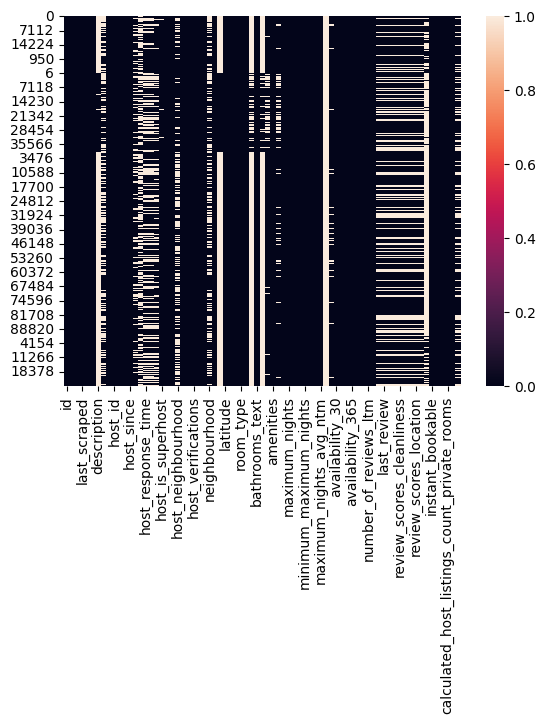

In [33]:
def visualize_missing_values(df):
    sns.heatmap(df.isnull())

visualize_missing_values(listings)


In [ ]:
# listings['BOOKING RATE'] = listings['minimum']

In [42]:
#display the first few rows of the df
print(df.head())

#Check missing values
print(df.isnull().sum())

#basic statistics of the data
print(df.describe())


                   id                                      listing_url  \
0  977395984065981849  https://www.airbnb.com/rooms/977395984065981849   
1  648033676238017128  https://www.airbnb.com/rooms/648033676238017128   
2  871990853610302281  https://www.airbnb.com/rooms/871990853610302281   
3            15943497            https://www.airbnb.com/rooms/15943497   
4  845596919658541172  https://www.airbnb.com/rooms/845596919658541172   

        scrape_id last_scraped       source  \
0  20240206005441   2024-02-06  city scrape   
1  20240206005441   2024-02-06  city scrape   
2  20240206005441   2024-02-06  city scrape   
3  20240206005441   2024-02-06  city scrape   
4  20240206005441   2024-02-10  city scrape   

                                                name  \
0      Home in Brooklyn · 1 bedroom · 1 bed · 1 bath   
1  Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...   
2  Rental unit in Queens · ★New · 1 bedroom · Hal...   
3  Home in Brooklyn · ★4.74 · 1 bedroom · 1 bed 

In [39]:
# List of column names you want to include in the correlation analysis
columns_to_include = ['accommodates', 'beds', 'minimum_nights', 'maximum_nights', 
                        'availability_30', 'availability_60', 'availability_90', 
                        'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                        'review_scores_location', 'review_scores_value']

# Select only the specified columns
df_selected = df[columns_to_include]

# Now compute the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()
print(correlation_matrix)

                             accommodates      beds  minimum_nights  \
accommodates                     1.000000  0.727774       -0.073968   
beds                             0.727774  1.000000       -0.049464   
minimum_nights                  -0.073968 -0.049464        1.000000   
maximum_nights                  -0.004638 -0.003398        0.000064   
availability_30                  0.096399  0.027581       -0.021097   
availability_60                  0.087224  0.010826       -0.020442   
availability_90                  0.090593  0.009999       -0.020497   
availability_365                 0.117286  0.034252       -0.008139   
number_of_reviews                0.021507  0.040173       -0.064501   
number_of_reviews_ltm            0.029989  0.030517       -0.094321   
number_of_reviews_l30d           0.014015  0.001424       -0.094339   
review_scores_rating             0.019269  0.026496       -0.008043   
review_scores_accuracy           0.004915  0.022561       -0.000269   
review

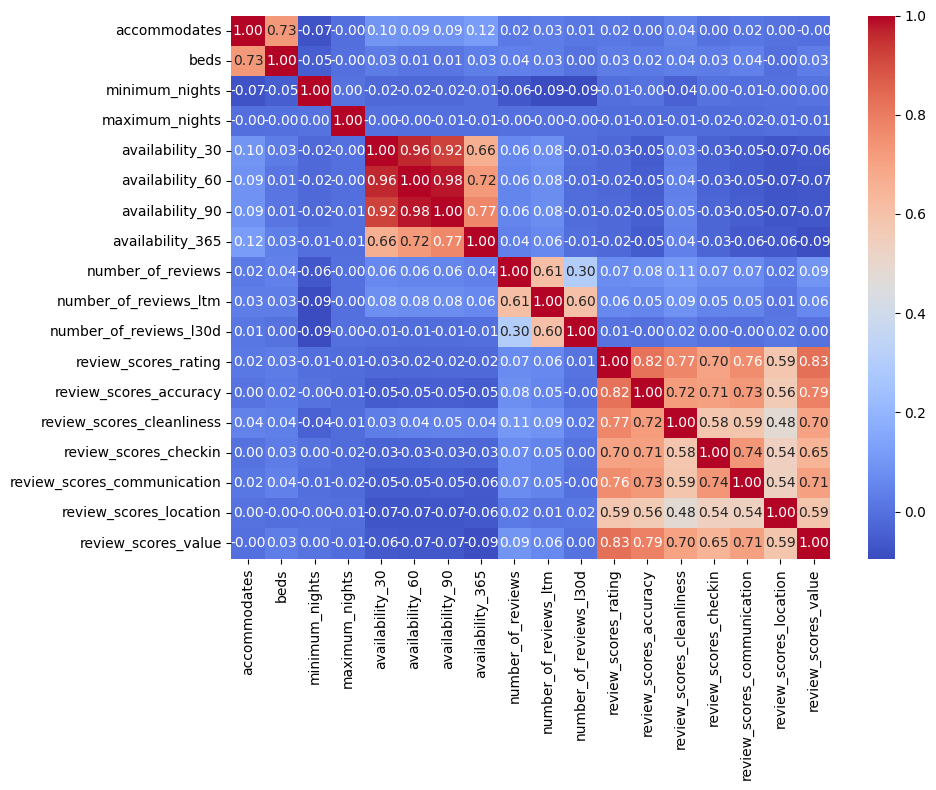

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

In [79]:
# plt.scatter(listings['review_scores_rating'],listings['availability_365'])

# f, axes = plt.subplots(1,8)
# features = [f"availability_{dur}" for dur in [30, 60, 90, 365]]
features = [
    'minimum_nights', 
    'maximum_nights', 
    'minimum_minimum_nights', 
    'maximum_minimum_nights', 
    'minimum_maximum_nights', 
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
]

# for i,feat in enumerate(features):
#     print(i//4, i%4)
#     sns.violinplot(data=listings, y=feat, ax=axes[i])

sns.violinplot(data=listings, x=features[0])
plt.show()

In [74]:
listings[features].columns[listings[features].columns.duplicated()]

Index([], dtype='object')

In [75]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [72]:
def get_full_summary(df, exclude_columns=None):
    
    if exclude_columns is None:
        exclude_columns = []
    
    # Exclude specified columns
    df_filtered = df.drop(columns=exclude_columns)
    
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df_filtered.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df_filtered.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df_filtered.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns, excluding specified columns
    categorical_summary = df_filtered.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}


# Specify columns to exclude
exclude_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url']
full_summary = get_full_summary(listings, exclude_columns)

print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

Numeric Summary:
        host_listings_count  host_total_listings_count       latitude  \
count         184887.000000              184887.000000  184902.000000   
mean              69.006750                 115.096632      35.999010   
std              424.989234                 674.522376      28.341661   
min                1.000000                   1.000000     -34.100680   
25%                1.000000                   1.000000      40.700632   
50%                2.000000                   3.000000      43.792535   
75%                7.000000                  10.000000      51.513530   
max             5110.000000                8879.000000      51.681642   
median             2.000000                   3.000000      43.792535   

            longitude   accommodates     bathrooms      bedrooms  \
count   184902.000000  184902.000000  24335.000000  33059.000000   
mean        -8.994592       3.179782      1.202979      1.407272   
std         74.676297       2.067364      0.5562

In [63]:
def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()



In [ ]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

{'missing_values': id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
                                                 ...  
 calculated_host_listings_count                      0
 calculated_host_listings_count_entire_homes         0
 calculated_host_listings_count_private_rooms        0
 calculated_host_listings_count_shared_rooms         0
 reviews_per_month                               49970
 Length: 75, dtype: int64,
 'data_types': id                                                int64
 listing_url                                      object
 scrape_id                                         int64
 last_scraped                                     object
 source                                           object
                                                  .

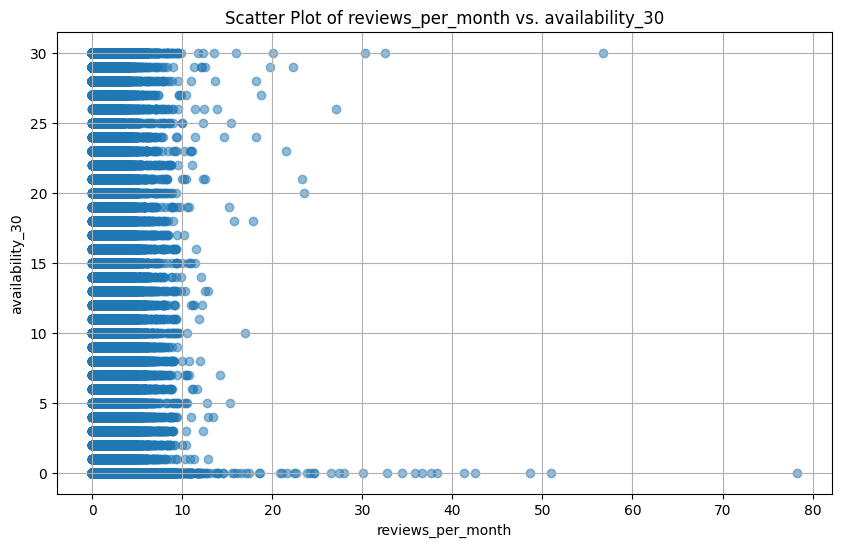

In [60]:
def plot_scatter(df, column_x, column_y):
  
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(df[column_x], df[column_y], alpha=0.5)  # Create scatter plot with some transparency
    plt.title(f'Scatter Plot of {column_x} vs. {column_y}')  # Set the title of the plot
    plt.xlabel(column_x)  # Set the x-axis label
    plt.ylabel(column_y)  # Set the y-axis label
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

plot_scatter(listings, 'reviews_per_month', 'availability_30')
